In [1]:
import pandas as pd

df = pd.read_csv("SalesKaggle3.csv")
df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             198917 non-null  int64  
 1   File_Type         198917 non-null  object 
 2   SKU_number        198917 non-null  int64  
 3   SoldFlag          75996 non-null   float64
 4   SoldCount         75996 non-null   float64
 5   MarketingType     198917 non-null  object 
 6   ReleaseNumber     198917 non-null  int64  
 7   New_Release_Flag  198917 non-null  int64  
 8   StrengthFactor    198917 non-null  float64
 9   PriceReg          198917 non-null  float64
 10  ReleaseYear       198917 non-null  int64  
 11  ItemCount         198917 non-null  int64  
 12  LowUserPrice      198917 non-null  float64
 13  LowNetPrice       198917 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB


In [3]:
print(df["SoldFlag"].value_counts() / len(df["SoldFlag"]))

0.0    0.316715
1.0    0.065334
Name: SoldFlag, dtype: float64


In [4]:
print(df["File_Type"].value_counts() / len(df["File_Type"]))

Active        0.617951
Historical    0.382049
Name: File_Type, dtype: float64


In [5]:
df.groupby(["File_Type"])['Order'].count()

File_Type
Active        122921
Historical     75996
Name: Order, dtype: int64

In [6]:
# 재고 가치
df = df[df["PriceReg"] > 0]
df["stockvalue"] = df["ItemCount"] * df["LowUserPrice"]

In [7]:
# 재고 소진 추정 기간
df["MOC"] = df.ItemCount.sum() / (df.SoldCount.sum()/6)

In [8]:
# 재고 보관 기간
df["stockage"] = 2024 - df["ReleaseYear"]

In [9]:
# 판매 할인 비율
import numpy as np
df['discount_rate'] = 100 - ((df['LowUserPrice'] / df['PriceReg']) * 100)
df['discount_rate'] = df['discount_rate'].replace([-np.inf, np.nan], 0)
# df['discount'] = np.round((df['PriceReg'] - df['LowNetPrice']) / df['PriceReg'])

In [10]:
df[['stockvalue','MOC','stockage','discount_rate']]

,stockvalue,MOC,stockage,discount_rate
0,231.76,2043.266783,9,35.607913
1,0.00,2043.266783,19,100.000000
2,1026.46,2043.266783,11,34.369565
3,2678.60,2043.266783,18,-33.930000
4,112.00,2043.266783,14,96.719967
...,...,...,...,...
198912,456.84,2043.266783,18,88.390284
198913,546.00,2043.266783,15,96.599190
198914,551.54,2043.266783,12,52.040000
198915,630.66,2043.266783,23,41.597444


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196368 entries, 0 to 198916
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             196368 non-null  int64  
 1   File_Type         196368 non-null  object 
 2   SKU_number        196368 non-null  int64  
 3   SoldFlag          74601 non-null   float64
 4   SoldCount         74601 non-null   float64
 5   MarketingType     196368 non-null  object 
 6   ReleaseNumber     196368 non-null  int64  
 7   New_Release_Flag  196368 non-null  int64  
 8   StrengthFactor    196368 non-null  float64
 9   PriceReg          196368 non-null  float64
 10  ReleaseYear       196368 non-null  int64  
 11  ItemCount         196368 non-null  int64  
 12  LowUserPrice      196368 non-null  float64
 13  LowNetPrice       196368 non-null  float64
 14  stockvalue        196368 non-null  float64
 15  MOC               196368 non-null  float64
 16  stockage          19

In [12]:
df.describe()

,Order,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,stockvalue,MOC,stockage,discount_rate
count,196368.000000,1.963680e+05,74601.000000,74601.000000,196368.000000,196368.00000,1.963680e+05,196368.000000,196368.000000,196368.000000,196368.000000,196368.000000,196368.000000,1.963680e+05,196368.000000,1.963680e+05
mean,106933.600673,8.527304e+05,0.171083,0.322275,3.411213,0.64208,1.096642e+06,92.075130,2006.093997,41.694013,30.827578,46.386144,1292.669076,2.043267e+03,17.906003,4.271824e+01
std,60070.716934,8.632254e+05,0.376584,1.170068,3.866541,0.47939,1.481100e+06,86.673039,8.872731,37.675745,69.274519,121.884278,2920.438238,2.273743e-13,8.872731,2.898268e+03
min,2.000000,5.000100e+04,0.000000,0.000000,0.000000,0.00000,6.275000e+00,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.043267e+03,6.000000,-1.187300e+06
25%,56202.750000,2.129075e+05,0.000000,0.000000,1.000000,0.00000,1.598679e+05,43.400000,2003.000000,21.000000,4.910000,17.970000,201.780000,2.043267e+03,13.000000,4.000893e+01
50%,109205.500000,6.098530e+05,0.000000,0.000000,2.000000,1.00000,5.771025e+05,69.990000,2007.000000,32.000000,16.000000,33.980000,456.300000,2.043267e+03,17.000000,7.286878e+01
75%,158724.250000,9.026610e+05,0.000000,0.000000,5.000000,1.00000,1.409014e+06,117.010000,2011.000000,50.000000,39.980000,55.190000,1263.462500,2.043267e+03,21.000000,9.199199e+01
max,208027.000000,3.960788e+06,1.000000,73.000000,99.000000,1.00000,1.738445e+07,12671.480000,2018.000000,2542.000000,14140.210000,19138.790000,296944.410000,2.043267e+03,2024.000000,1.000000e+02


In [13]:
df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,stockvalue,MOC,stockage,discount_rate
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84,231.76,2043.266783,9,35.607913
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54,0.00,2043.266783,19,100.000000
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97,1026.46,2043.266783,11,34.369565
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15,2678.60,2043.266783,18,-33.930000
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99,112.00,2043.266783,14,96.719967


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,stockvalue,MOC,stockage,discount_rate
0,2,1,1737127,0.0,0.0,0,15,1,682743.0,44.99,2015,8,28.97,31.84,231.76,2043.266783,9,35.607913
1,3,1,3255963,0.0,0.0,0,7,1,1016014.0,24.81,2005,39,0.00,15.54,0.00,2043.266783,19,100.000000
2,4,1,612701,0.0,0.0,0,0,0,340464.0,46.00,2013,34,30.19,27.97,1026.46,2043.266783,11,34.369565
3,6,1,115883,1.0,1.0,0,4,1,334011.0,100.00,2006,20,133.93,83.15,2678.60,2043.266783,18,-33.930000
4,7,1,863939,1.0,1.0,0,2,1,1287938.0,121.95,2010,28,4.00,23.99,112.00,2043.266783,14,96.719967


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196368 entries, 0 to 198916
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             196368 non-null  int64  
 1   File_Type         196368 non-null  int32  
 2   SKU_number        196368 non-null  int64  
 3   SoldFlag          74601 non-null   float64
 4   SoldCount         74601 non-null   float64
 5   MarketingType     196368 non-null  int32  
 6   ReleaseNumber     196368 non-null  int64  
 7   New_Release_Flag  196368 non-null  int64  
 8   StrengthFactor    196368 non-null  float64
 9   PriceReg          196368 non-null  float64
 10  ReleaseYear       196368 non-null  int64  
 11  ItemCount         196368 non-null  int64  
 12  LowUserPrice      196368 non-null  float64
 13  LowNetPrice       196368 non-null  float64
 14  stockvalue        196368 non-null  float64
 15  MOC               196368 non-null  float64
 16  stockage          19

In [16]:
print(df["File_Type"].value_counts() / len(df["File_Type"]))

0    0.620096
1    0.379904
Name: File_Type, dtype: float64


In [17]:
X = df.drop(columns=["SoldFlag","SoldCount","Order","SKU_number","ReleaseYear","File_Type"])
y = df["File_Type"]

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(137457, 12)
(58911, 12)
(137457,)
(58911,)


## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [38]:
param_grid = {
    'n_estimators': [30, 40],
    'max_depth': [10, 15],
    'min_samples_split': [1, 2],
    'min_samples_leaf': [3, 4],
    'max_features': ['sqrt'],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
   

Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 40}


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"accuracy: {accuracy}")
print("\nconfusion matrix:")
print(confusion)
print("\nreport:")
print(report)

accuracy: 0.9005279149904093

confusion matrix:
[[34720  1859]
 [ 4001 18331]]

report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     36579
           1       0.91      0.82      0.86     22332

    accuracy                           0.90     58911
   macro avg       0.90      0.89      0.89     58911
weighted avg       0.90      0.90      0.90     58911



Text(50.722222222222214, 0.5, 'True Label')

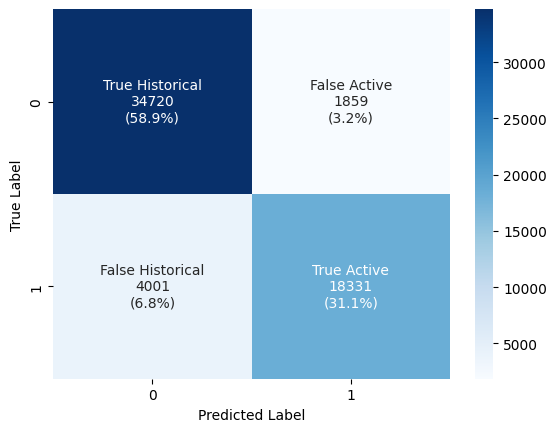

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Historical", "False Active", "False Historical", "True Active"]
group_counts = [value for value in cf_matrix.flatten()]
group_percentages = [f"{value:.1%}" for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n({v3})" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [24]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

             feature  importance
8         stockvalue    0.297956
6       LowUserPrice    0.174151
11     discount_rate    0.172107
7        LowNetPrice    0.079159
3     StrengthFactor    0.075418
4           PriceReg    0.046773
10          stockage    0.041207
5          ItemCount    0.039277
1      ReleaseNumber    0.035838
0      MarketingType    0.023429
2   New_Release_Flag    0.014686
9                MOC    0.000000


## XGBoost

In [25]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=300)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
from xgboost import XGBClassifier

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [150, 200],
    'learning_rate': [0.05, 0.01],
    'max_depth': [10, 15],
    'min_child_weight': [2, 3],
    'subsample': [0.8],
    'colsample_bytree': [1],
    'gamma': [0.05, 0.07]
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", grid_search.best_params_)

Best parameters: {'colsample_bytree': 1, 'gamma': 0.05, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 200, 'subsample': 0.8}


In [26]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')  # Windows 사용자

# 한글 깨짐 방지를 위한 마이너 문제 해결
plt.rcParams['axes.unicode_minus'] = False

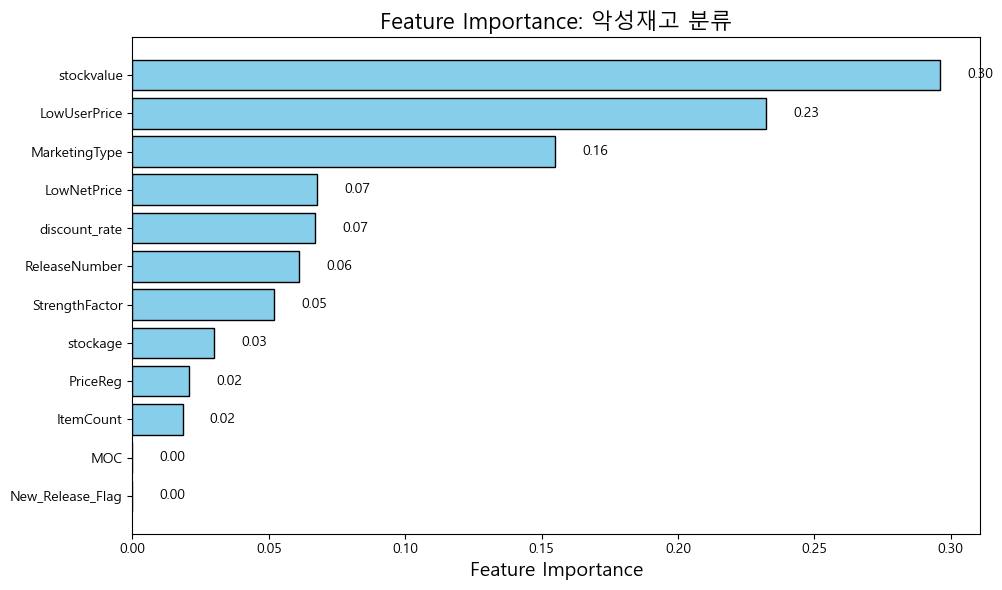

In [27]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = model.feature_importances_

# 변수 이름 (X_train의 feature columns)
features = X.columns

# 중요도 순으로 정렬
indices = np.argsort(feature_importances)[::-1]

# 바 차트 생성
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), feature_importances[indices], color='skyblue', edgecolor='k')
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel('Feature Importance', fontsize=14)
plt.title('Feature Importance: 악성재고 분류', fontsize=16)
plt.gca().invert_yaxis()  # 상위 중요 변수가 위로 오도록
plt.tight_layout()

# 바 위에 중요도 값 추가
for i, v in enumerate(feature_importances[indices]):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center', fontsize=10)

plt.show()

In [28]:
from scipy.stats import pointbiserialr

# 재고가치와 악성재고 여부 상관계수
cor_stock_value, p_value_stock = pointbiserialr(df['File_Type'], df['stockvalue'])

# 최저소비자가격과 악성재고 여부 상관계수
cor_min_price, p_value_price = pointbiserialr(df['File_Type'], df['LowUserPrice'])

cor_min_marketing, p_value_marketing = pointbiserialr(df['File_Type'], df['MarketingType'])

print(f"재고가치 상관계수: {cor_stock_value:.2f}, p-value: {p_value_stock:.4f}")
print(f"최저소비자가격 상관계수: {cor_min_price:.2f}, p-value: {p_value_price:.4f}")
print(f"마케팅타입 상관계수: {cor_min_marketing:.2f}, p-value: {p_value_marketing:.4f}")


재고가치 상관계수: 0.35, p-value: 0.0000
최저소비자가격 상관계수: 0.29, p-value: 0.0000
마케팅타입 상관계수: 0.05, p-value: 0.0000


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"accuracy: {accuracy}")
print("\nconfusion matrix:")
print(confusion)
print("\nreport:")
print(report)

accuracy: 0.9054166454482185

confusion matrix:
[[34617  1962]
 [ 3610 18722]]

report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     36579
           1       0.91      0.84      0.87     22332

    accuracy                           0.91     58911
   macro avg       0.91      0.89      0.90     58911
weighted avg       0.91      0.91      0.90     58911



Text(51.722222222222214, 0.5, 'True Label')

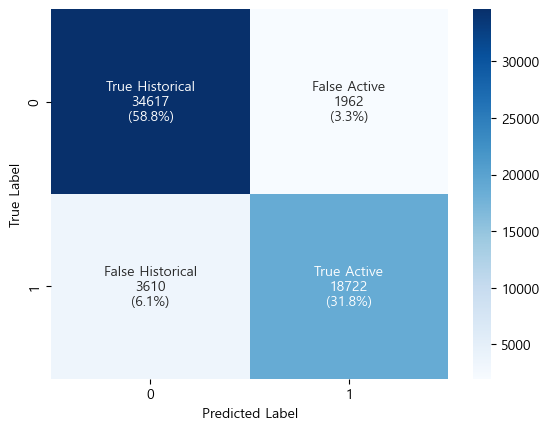

In [30]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Historical", "False Active", "False Historical", "True Active"]
group_counts = [value for value in cf_matrix.flatten()]
group_percentages = [f"{value:.1%}" for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n({v3})" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [31]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

             feature  importance
8         stockvalue    0.295951
6       LowUserPrice    0.232384
0      MarketingType    0.155060
7        LowNetPrice    0.067696
11     discount_rate    0.066779
1      ReleaseNumber    0.061107
3     StrengthFactor    0.052066
10          stockage    0.029987
4           PriceReg    0.020593
5          ItemCount    0.018377
2   New_Release_Flag    0.000000
9                MOC    0.000000


## KNN Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [44]:
# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_neighbors' : [5, 7, 12, 15]
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", grid_search.best_params_)

Best parameters: {'n_neighbors': 15}


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"accuracy: {accuracy}")
print("\nconfusion matrix:")
print(confusion)
print("\nreport:")
print(report)

accuracy: 0.8480928858786984

confusion matrix:
[[34682  1897]
 [ 7052 15280]]

report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     36579
           1       0.89      0.68      0.77     22332

    accuracy                           0.85     58911
   macro avg       0.86      0.82      0.83     58911
weighted avg       0.85      0.85      0.84     58911



Text(51.722222222222214, 0.5, 'True Label')

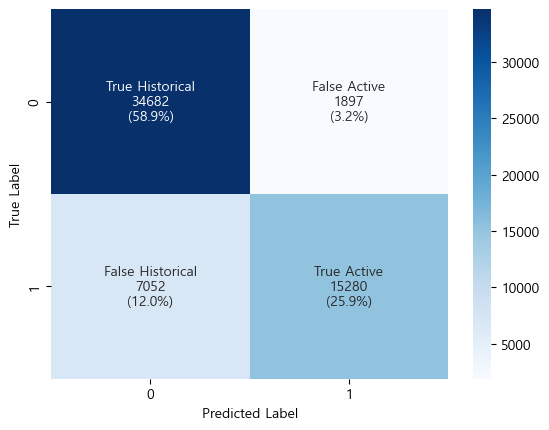

In [34]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Historical", "False Active", "False Historical", "True Active"]
group_counts = [value for value in cf_matrix.flatten()]
group_percentages = [f"{value:.1%}" for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n({v3})" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 하이퍼파라미터 그리드 설정
param_grid = {
    # 'C': [0.001, 0.005, 0.01],
    'C': [0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'solver': ['saga', 'liblinear'],
    'max_iter' : [70, 100, 130]
}

# GridSearchCV로 최적의 하이퍼파라미터 탐색
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("최적 하이퍼파라미터: ", grid.best_params_)
print("최고 교차 검증 점수: ", grid.best_score_)

C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Us

최적 하이퍼파라미터:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
최고 교차 검증 점수:  0.8135344306404567


In [33]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"accuracy: {accuracy}")
print("\nconfusion matrix:")
print(confusion)
print("\nreport:")
print(report)

accuracy: 0.8135662270204206

confusion matrix:
[[33761  2793]
 [ 8190 14167]]

report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86     36554
           1       0.84      0.63      0.72     22357

    accuracy                           0.81     58911
   macro avg       0.82      0.78      0.79     58911
weighted avg       0.82      0.81      0.81     58911



Text(50.722222222222214, 0.5, 'True Label')

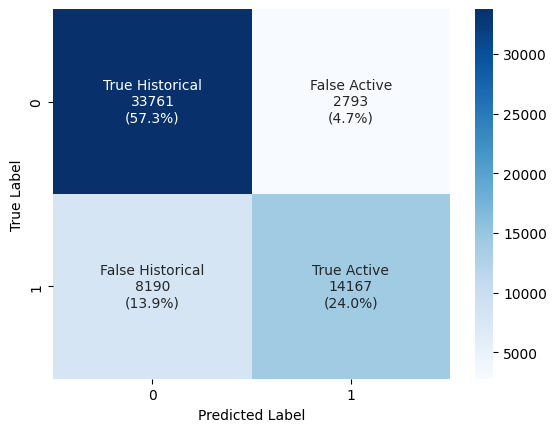

In [34]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Historical", "False Active", "False Historical", "True Active"]
group_counts = [value for value in cf_matrix.flatten()]
group_percentages = [f"{value:.1%}" for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n({v3})" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
X_train = pd.DataFrame(X_train, columns = X.columns)

In [37]:
import statsmodels.api as sm

logreg = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.440299
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              File_Type   No. Observations:               137457
Model:                          Logit   Df Residuals:                   137445
Method:                           MLE   Df Model:                           11
Date:                Thu, 12 Dec 2024   Pseudo R-squ.:                  0.3372
Time:                        16:06:46   Log-Likelihood:                -60522.
converged:                       True   LL-Null:                       -91314.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
MarketingType        0.8299      0.017     50.231      0.000       0.798       0.862
ReleaseNumb

In [38]:
import numpy as np

odds = np.exp(logreg.params)

for i in range(1, len(odds)):
    print(f'변수 {X_train.columns[i-1]}의 logit : {logreg.params[i] : .3f}')
    print(f'변수 {X_train.columns[i-1]}가 1단위 증가할 때, 악성재고일 로짓(odds ratio에 자연로그를 취한 값)이{logreg.params[i] : .3f}배 증가한다.')
    print(f'변수 {X_train.columns[i-1]}의 odds ratio : {odds[i] : .3f}')
    print(f'변수 {X_train.columns[i-1]}가 1단위 증가할 때, 악성재고일 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다{odds[i] : .3f}배 증가한다.\n')

변수 MarketingType의 logit :  0.001
변수 MarketingType가 1단위 증가할 때, 악성재고일 로짓(odds ratio에 자연로그를 취한 값)이 0.001배 증가한다.
변수 MarketingType의 odds ratio :  1.001
변수 MarketingType가 1단위 증가할 때, 악성재고일 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 1.001배 증가한다.

변수 ReleaseNumber의 logit :  0.941
변수 ReleaseNumber가 1단위 증가할 때, 악성재고일 로짓(odds ratio에 자연로그를 취한 값)이 0.941배 증가한다.
변수 ReleaseNumber의 odds ratio :  2.561
변수 ReleaseNumber가 1단위 증가할 때, 악성재고일 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 2.561배 증가한다.

변수 New_Release_Flag의 logit :  0.000
변수 New_Release_Flag가 1단위 증가할 때, 악성재고일 로짓(odds ratio에 자연로그를 취한 값)이 0.000배 증가한다.
변수 New_Release_Flag의 odds ratio :  1.000
변수 New_Release_Flag가 1단위 증가할 때, 악성재고일 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 1.000배 증가한다.

변수 StrengthFactor의 logit : -0.003
변수 StrengthFactor가 1단위 증가할 때, 악성재고일 로짓(odds ratio에 자연로그를 취한 값)이-0.003배 증가한다.
변수 StrengthFactor의 odds ratio :  0.997
변수 StrengthFactor가 1단위 증가할 때, 악성재고일 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 0.997배 증가한다.

변수 PriceReg의 logit : -0.009
변수 PriceReg가 1단위 증가할 때, 악성재고일 로짓(odds ratio에 자연로그를 취한 값)

In [39]:
sig_level = .05
logistic_variable = pd.concat([logreg.params, np.exp(logreg.params), np.round(logreg.pvalues,4)], axis=1)
logistic_variable.columns = ['logit', 'odds ratio', 'p-value']
logistic_variable.loc[logistic_variable['p-value'] > sig_level, f'above {sig_level*100}%'] = 'No'
logistic_variable.loc[logistic_variable['p-value'] < sig_level, f'above {sig_level*100}%'] = 'Yes'
print(logistic_variable)

                         logit  odds ratio  p-value above 5.0%
MarketingType     8.298995e-01    2.293088   0.0000        Yes
ReleaseNumber     1.486817e-03    1.001488   0.5009         No
New_Release_Flag  9.405623e-01    2.561421   0.0000        Yes
StrengthFactor    2.118439e-07    1.000000   0.0000        Yes
PriceReg         -2.627363e-03    0.997376   0.0000        Yes
ItemCount        -9.379373e-03    0.990664   0.0000        Yes
LowUserPrice      2.191724e-02    1.022159   0.0000        Yes
LowNetPrice      -4.462162e-03    0.995548   0.0000        Yes
stockvalue        1.036328e-03    1.001037   0.0000        Yes
MOC              -1.492910e-03    0.998508   0.0000        Yes
stockage          2.530160e-02    1.025624   0.0000        Yes
discount_rate    -9.050643e-05    0.999909   0.1062         No


Text(50.722222222222214, 0.5, 'True Label')

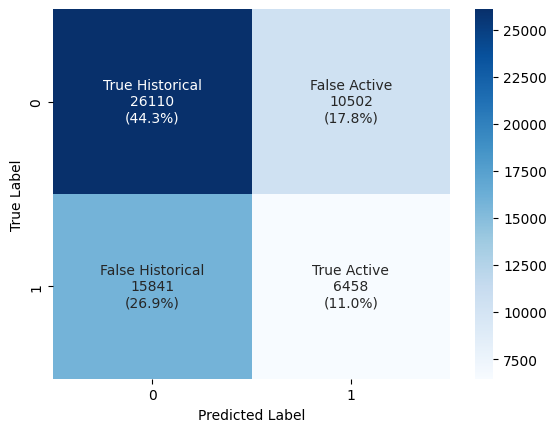

In [40]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Historical", "False Active", "False Historical", "True Active"]
group_counts = [value for value in cf_matrix.flatten()]
group_percentages = [f"{value:.1%}" for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n({v3})" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth=7,
                               min_samples_leaf=2, min_samples_split=2,
                               max_features=12)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_features=12, min_samples_leaf=2)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, f1_score, fbeta_score

estimator = DecisionTreeClassifier()
cv = KFold(n_splits = 10, random_state=42, shuffle=True)

scorer = make_scorer(f1_score, pos_label=1)

parameters = {'max_depth' : [6, 8, 10],
             'criterion' : ['gini'],
             'splitter' : ['best'],
             'min_samples_split' : [1, 2],
             'min_samples_leaf' : [2],
             'max_leaf_nodes' : [24, 32]}

model = GridSearchCV(estimator = estimator, 
                    param_grid = parameters,
                    scoring = scorer,
                    cv = cv, verbose = 1,
                    n_jobs = -1, refit = True)

model.fit(X_train, y_train)

print("Best Estimator : \n", model.best_estimator_);print()
print("Best Params : \n", model.best_params_);print()
print("Best Score : \n", model.best_score_);print()

Fitting 10 folds for each of 12 candidates, totalling 120 fits


C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
  

Best Estimator : 
 DecisionTreeClassifier(max_depth=8, max_leaf_nodes=32, min_samples_leaf=2)

Best Params : 
 {'criterion': 'gini', 'max_depth': 8, 'max_leaf_nodes': 32, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}

Best Score : 
 0.8291522945339953



In [42]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"accuracy: {accuracy}")
print("\nconfusion matrix:")
print(confusion)
print("\nreport:")
print(report)

accuracy: 0.8806504727470251

confusion matrix:
[[34973  1639]
 [ 5392 16907]]

report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     36612
           1       0.91      0.76      0.83     22299

    accuracy                           0.88     58911
   macro avg       0.89      0.86      0.87     58911
weighted avg       0.88      0.88      0.88     58911



Text(50.722222222222214, 0.5, 'True Label')

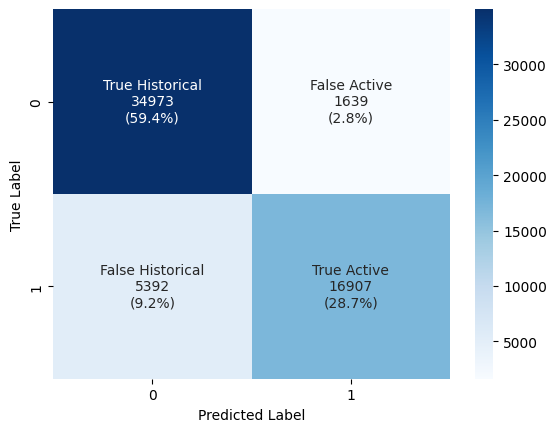

In [43]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Historical", "False Active", "False Historical", "True Active"]
group_counts = [value for value in cf_matrix.flatten()]
group_percentages = [f"{value:.1%}" for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n({v3})" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [44]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

             feature  importance
8         stockvalue    0.707243
11     discount_rate    0.077009
3     StrengthFactor    0.064216
7        LowNetPrice    0.050244
6       LowUserPrice    0.037513
2   New_Release_Flag    0.030779
0      MarketingType    0.018879
4           PriceReg    0.005459
1      ReleaseNumber    0.004300
5          ItemCount    0.002648
10          stockage    0.001710
9                MOC    0.000000
